In [1]:
exec(open('init_notebook.py').read())

current working dirD:\ML\nlp\nlp-practice


# Document Classification Bag of words

### Using Scikit-Learn: CountVectorizer

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adhocmaster\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adhocmaster\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adhocmaster\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adhocmaster\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adhocmaster\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# !wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [5]:
df = pd.read_csv("./data/bbc_text_cls.csv")

In [6]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [7]:
inputs = df['text']
labels = df['labels']

<AxesSubplot: >

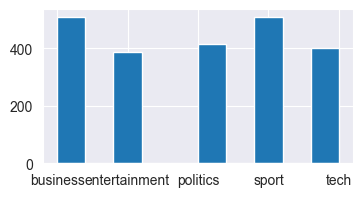

In [8]:
labels.hist(figsize=(4,2))

### Building a model without preprocessing data

In [9]:
RawX_train, RawX_test, Ytrain, Ytest = train_test_split(
    inputs, 
    labels, 
    random_state=42
) 

In [10]:
vectorizer = CountVectorizer()
Xtrain = vectorizer.fit_transform(RawX_train)
Xtest = vectorizer.transform(RawX_test)

In [11]:
Xtrain

<1668x26157 sparse matrix of type '<class 'numpy.int64'>'
	with 337538 stored elements in Compressed Sparse Row format>

In [12]:
(Xtrain != 0).sum()

337538

In [13]:
# percentage non zero in Xtrain!
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.00773639604201488

In [14]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.9952038369304557
test score 0.9712746858168761


### Building a model with preprocessing data

In [15]:
# first convert inputs
from typing import List, Tuple
def treebankToWordnetPOS(treebankTag: str) -> str:
    if treebankTag.startswith("J"):
        return wordnet.ADJ
    if treebankTag.startswith("V"):
        return wordnet.VERB
    if treebankTag.startswith("N"):
        return wordnet.NOUN
    if treebankTag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize(inputs) -> List[Tuple[str, str]]:
    
    lemmatizer = WordNetLemmatizer()
    
    output = []
    for rawDoc in tqdm(inputs, desc = "lemmatizing"):
        # break, get tags, remake sentence
        wordsAndTags = nltk.pos_tag(word_tokenize(rawDoc))
        lemmatizedWs = [lemmatizer.lemmatize(word, treebankToWordnetPOS(tag)) 
                            for word, tag in wordsAndTags]
        output.append(" ".join(lemmatizedWs))
    
    return output
    

In [16]:
lemmaInputs = lemmatize(inputs)

lemmatizing: 100%|█████████████████████████████████████████████████████████████████| 2225/2225 [00:41<00:00, 53.86it/s]


In [17]:
assert len(lemmaInputs) == len(inputs)

In [18]:
RawX_train, RawX_test, Ytrain, Ytest = train_test_split(
    lemmaInputs, 
    labels, 
    random_state=42
) 
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
Xtrain = vectorizer.fit_transform(RawX_train)
Xtest = vectorizer.transform(RawX_test)

In [19]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.9958033573141487
test score 0.9694793536804309


## Building a model with TF-IDF

In [20]:

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
Xtrain = vectorizer.fit_transform(RawX_train)
Xtest = vectorizer.transform(RawX_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.988009592326139
test score 0.9605026929982047


### with L1 normalization

In [21]:

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), norm="l1")
Xtrain = vectorizer.fit_transform(RawX_train)
Xtest = vectorizer.transform(RawX_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score", model.score(Xtrain, Ytrain))
print("test score", model.score(Xtest, Ytest))

train score 0.459832134292566
test score 0.466786355475763
